# Regressions From Scratch
***
## Table of Contents
1. [Loading Data](#content1)
2. [Linear Regression](#content2)
3. [Loss Function(MSE)](#content3)
4. [Gradient Descent](#content4)
5. [Compare with Scikit-Learn](#content5)
6. [Logistic Regression](#content6)
7. [Loss Function (BCE)](#content7)
***

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

<a class="anchor" id="content1"></a>
## 1. Loading Data

In [71]:
data = pd.read_csv("linear_data.txt", header=None)
x = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, 1])

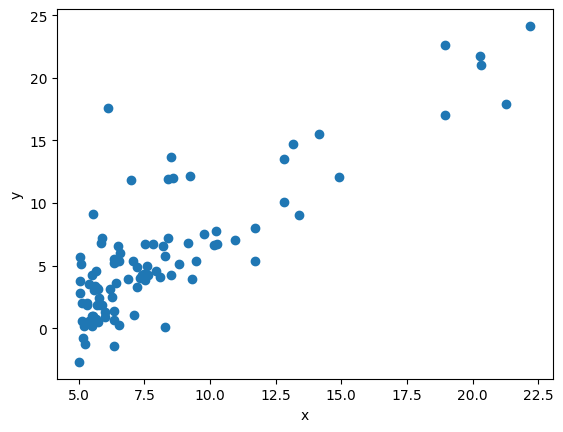

In [72]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Linear Regression <a class="anchor" id="content2"></a>

Let's say there is a simple linear regression:
```math
y = h = wx + b
```
Where:

- $x$ is the independent variable,
- $w$ is the slope (weight, coefficient of $x$), and
- $b$ is the intercept (bias, constant term).

A linear regression model provides numerical predictions as a straight line on a dataset, assuming a linear reiatonship between two numerical variables.

In [73]:
# ! Linear function h
def h(w:float, b:float, x:float) -> float:
    return w * x + b

## 3. Loss Function (MSE) <a class="anchor" id="content3"></a>
The loss function (or the cost function) quantifies the error between the predicted values produced by a model and the actual target values from the data. Common loss functions are Mean Squared Error (MSE) for regression problems, and Cross-Entropy Loss for classification tasks.
Here's the equation of MSE:

```math
L = \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
```
Where:
- $y$ is the actual value.
- $\hat{y}$ is the predicted value.
- $n$ is the number of data points

MSE is simply the average squared difference between the actual and the predicted values in the dataset.

In [74]:
# ! Loss function L - Mean Squared Error (MSE)
def calculate_loss_MSE(w: float, b: float, x: np.array, y: np.array) -> float:
    total_err: float = 0.0
    for i in range(len(x)):
        y_hat = h(w, b, x[i])
        total_err += (y[i]-y_hat) ** 2
    return total_err/len(x)

## 4. Gradient Descent <a class="anchor" id="content4"></a>


Gradient Descent is an algorithm that tries to find optimised hyperparameters by iteratively searching for a local minima of the loss function. It is one of the most important concepts in machine learning and is used to reduce errors when training models. There are four types of Gradient Descent: **Batch Gradient Descent**, **Stochastic Gradient Descent**, **Mini-Batch Gradient Descent** and **Momentum-Based Gradient Descent**. For practice purposes, the most basic type, Batch Gradient Descent, will be used in this notebook.

We compute the derivative (or gradient) of the loss function to determine the slope of the function at a given point. By iteratively adjusting the parameters of the model in the direction opposite to the gradient (gradient descent), the algorithm moves closer to the point where the cost function reaches its minimum value. This occurs when the slope of the function becomes zero, indicating that the gradient has flattened and the cost is minimised. When the slope is steep, we take a big step for each iteration. As we get closer to the optimised value, the step becomes smaller.

```math
L = \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 \\
= \dfrac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2

```

By applying the power rule $(f(x)^n)' = n \cdot f(x)^{n-1} \cdot f'(x)$, the derivatives of the loss function $L$ with respect to two different hyperparameters, $w$ and $b$, are described as follows:

```math
\dfrac{dL}{dw} = \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial w} (y_i - w x_i -b) \\
= \dfrac{2}{n} \sum_{n=1}^{n} (y_i - w x_i -b) \cdot (-x_i) \\
= - \dfrac{2}{n} \sum_{n=1}^{n} x_i (y_i - \hat{y_i})^2
```

```math
\dfrac{dL}{db} = \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial b} (y_i - w x_i -b) \\
= - \dfrac{2}{n} \sum_{n=1}^{n} (y_i - \hat{y_i})^2
```

In [75]:
# ! Derivative of cost function L
def dL(w: float, b: float, x: np.array, y: np.array) -> tuple[float, float]:
    y_pred = h(w, b, x)
    n = len(x)
    dL_dw = -2*np.sum((y - y_pred) * x) / n
    dL_db = -2*np.sum(y - y_pred) / n
    return dL_dw, dL_db

In each iteration of the gradient descent (epoch), the derivatives aboves are calculated and the hyperparameters $w$ and $b$ are be updated as:

```math
w_{new} = w_{old} - \alpha \cdot \dfrac{\partial L}{\partial w}
```
```math
b_{new} = b_{old} - \alpha \cdot \dfrac{\partial L}{\partial b}
```
where $\alpha$ is called the learning rate, a scaler value that controls the step size of updates during gradient descent.

In [76]:
# ! Batch Gradient Descent
def gradient_descent(w: float, b: float, x: np.array, y: np.array,
                     alpha: float, epochs: int = 5000) -> tuple[float, float, np.array]:
    loss_list = []
    for _ in tqdm(range(epochs)):
        loss_list.append(calculate_loss_MSE(w, b, x, y))
        dL_dw, dL_db = dL(w, b, x, y)
        w -= alpha * dL_dw
        b -= alpha * dL_db
    return w, b, np.array(loss_list)

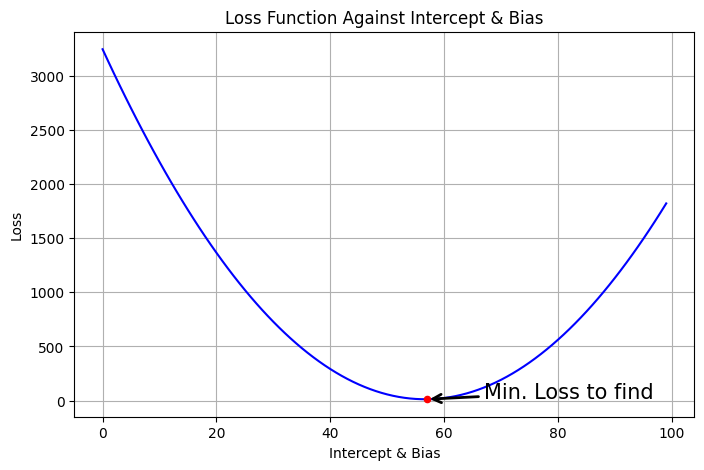

In [77]:
random_w_vals = np.linspace(-5, 5, 100)
random_b_vals = np.linspace(-5, 5, 100)
trace_lf_list = []

for w_val, b_val in zip(random_w_vals,random_b_vals):
    trace_lf_list.append(calculate_loss_MSE(w_val, b_val, x, y))
trace_lf_w = np.array(trace_lf_list)
plt.figure(figsize=(8, 5))
plt.plot(trace_lf_w, color='b')

min_loss_idx = np.argmin(trace_lf_w)
min_loss_value = trace_lf_w[min_loss_idx]
# Add a marker at the minimum value
plt.scatter(min_loss_idx, min_loss_value, color="red", marker="o", s=20, zorder=5)
plt.annotate(
    "Min. Loss to find",
    xy=(min_loss_idx, min_loss_value),
    xytext=(min_loss_idx + 10, min_loss_value + 10),  # Adjust arrow placement
    arrowprops=dict(facecolor="black", arrowstyle="->", lw=2),
    fontsize=15,
    color="black",
)
plt.title('Loss Function Against Intercept & Bias')
plt.xlabel('Intercept & Bias')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

By tracing the curve of the loss function using arbitrary values for $w$ and $b$ (100 data points each evenly spaced between -5 and +5), we obtain a quadratic curve due to the squared term in the MSE formula. The red point at the bottom of the curve represents the point where the regression produces the least amount of error. Gradient descent attempts to find a value as close as possible to this point by optimising the hyperparameters.

Let's execute the gradient descent function assuming that $\alpha = 0.01$, $w=5$, and $b=3$.

In [78]:
# * alpha: Learning rate
alpha = 0.01
# * Assume that w = 5 and b = 3
coeff_GD, intercept_GD, loss_array = gradient_descent(5, 3, x, y, alpha)
print(f'Coefficient (GD): {coeff_GD:.5f}, Intercept (GD): {intercept_GD:.5f}')

100%|██████████| 5000/5000 [00:00<00:00, 36452.43it/s]

Coefficient (GD): 1.19303, Intercept (GD): -3.89578


According to the obtained results, the optimised coefficient ($w$) and intercept ($b$) for this dataset are 1.19303 and -3.89578 respectively.

Notice that the total loss decreases over epochs as GD iteratively updates the hyperparameters.

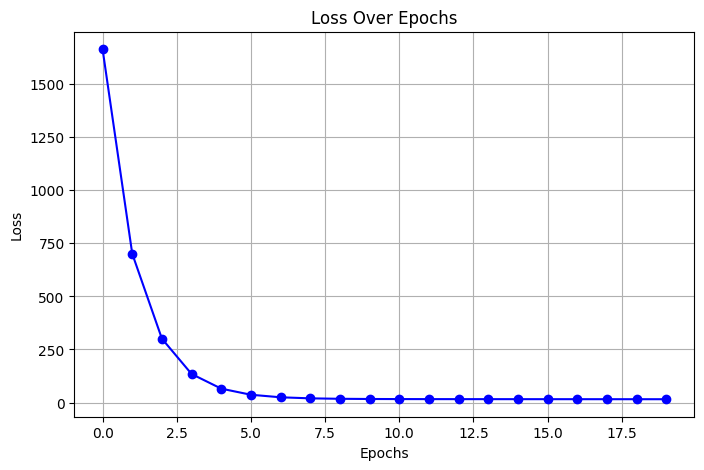

In [79]:
plt.figure(figsize=(8, 5))
plt.plot(loss_array[:20], marker='o', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.grid(True)
plt.show()

Here's the visualisation of the linear model above with optimised weight and bias.

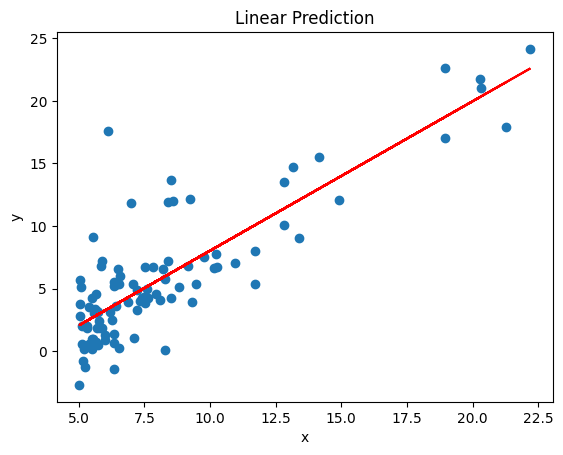

In [80]:
plt.scatter(x, y)
plt.plot(x, h(coeff_GD, intercept_GD, x), color="red")
plt.title('Linear Prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 5. Compare with Scikit-Learn <a class="anchor" id="content5"></a>
Scikit-learn is an open source library for machine learning in Python. It provides a plenty of tools that allow us to quickly build machine learning models.

In [81]:
# * For LinearRegression() from scikit-learn library, 2D arrays are expected.
x_sk = x.reshape(-1, 1)
y_sk = y.reshape(-1, 1)

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_sk, y_sk)

LinearRegression()

In [83]:
# * .items() extracts the scalar value from the array, eliminating the outer brackets.
print(f'Intercept (sklearn): {lr.intercept_.item():.5f}')
print(f'Intercept (GD): {intercept_GD:.5f}')
print(f'Coef. of regression (sklearn): {lr.coef_.item():.5f}')
print(f'Coef. of regression (GD): {coeff_GD:.5f}')

Intercept (sklearn): -3.89578
Intercept (GD): -3.89578
Coef. of regression (sklearn): 1.19303
Coef. of regression (GD): 1.19303


## 6. Logistic Regression <a class="anchor" id="content6"></a>

Logistic Regression is a machine learning algorithm used for binary classification tasks, predicting the probability of a dicrete or categorical outcome. To obtain predictions ,in case of binary classification, we need to use the sigmoid function which takes a numerical independent variable as an input and returns a value between 0 and 1. The logistic regression is of the form: 
```math
S(z) = \dfrac{1}{1+e^{-z}}
```

where $h$ is the linear regression formula: $h = wx + b$

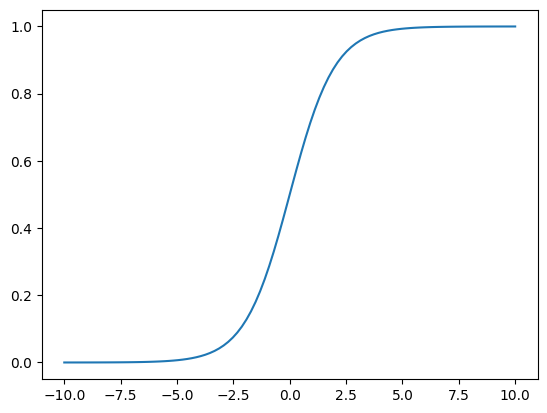

In [84]:
# ! Implement a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

## 7. Loss Function (BCE) <a class="anchor" id="content7"></a>


For a logistic regression problem, Binary Cross-Entropy is the loss function used to quantify the errors between the true and predicted values.


```math
L = - \dfrac{1}{n} \sum_{i=1}^{n} y \log(\hat y) + (1-y) \log(1- \hat y)
```

In [85]:
# Hypothesis function with sigmoid activation
def hypothesis(X, W):
    return sigmoid(np.dot(X, W))

# Binary cross-entropy loss function
def calculate_loss_BCE(y, y_pred, n):
    return - (1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient descent for logistic regression
def gradient_descent(X, y, W, alpha, epochs):
    n = len(y)  # Number of samples
    for epoch in range(epochs):
        y_pred = hypothesis(X, W)  # Predicted probabilities
        error = y_pred - y         # Prediction error
        gradient = (1 / n) * np.dot(X.T, error)  # Compute gradient
        W -= alpha * gradient      # Update weights
        
        # Optional: Print loss every 1000 epochs
        if epoch % 1000 == 0:
            loss = calculate_loss_BCE(y, y_pred, n)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return W

# Main function to test logistic regression
def logistic_regression():
    # Generate dummy data (binary classification problem)
    np.random.seed(42)
    X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
    y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Linear decision boundary
    
    # Add intercept term (bias) to feature matrix
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize weights (3 weights for 2 features + intercept)
    W = np.zeros(X.shape[1])
    
    # Set hyperparameters
    alpha = 0.01  # Learning rate
    epochs = 10000  # Number of iterations
    
    # Train logistic regression model
    W = gradient_descent(X, y, W, alpha, epochs)
    
    # Print final weights
    print(f"Optimized weights: {W}")
    
    # Make predictions
    y_pred = hypothesis(X, W)
    y_pred_labels = (y_pred >= 0.5).astype(int)
    print(f"Accuracy: {np.mean(y_pred_labels == y) * 100:.2f}%")

# Run the logistic regression model
logistic_regression()


Epoch 0, Loss: 0.6931
Epoch 1000, Loss: 0.4850
Epoch 2000, Loss: 0.3933
Epoch 3000, Loss: 0.3379
Epoch 4000, Loss: 0.3010
Epoch 5000, Loss: 0.2744
Epoch 6000, Loss: 0.2542
Epoch 7000, Loss: 0.2383
Epoch 8000, Loss: 0.2253
Epoch 9000, Loss: 0.2145
Optimized weights: [-5.90605257  0.67254103  0.50700777]
Accuracy: 95.00%
